In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
match_data = pd.read_csv('data/matches.csv')
top_bat = pd.read_excel('data/Top_100_batsman.xlsx')
top_ball = pd.read_excel('data/Top_100_bowlers.xlsx')
auction = pd.read_excel('data/Auction.xlsx')

In [148]:
match_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,4/9/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [5]:
# we can see NaN values in data 
match_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [143]:
print(match_data.isnull().sum())
print(top_bat.isnull().sum())
print(top_ball.isnull().sum())
print(auction.isnull().sum())

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64
POS       0
PLAYER    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64
POS       0
PLAYER    0
Mat       0
Inns      0
Ov        0
Runs      0
Wkts      0
BBI       0
Avg       0
Econ      0
SR        0
4w        0
5w        0
dtype: int64
TEAM                              0
PLAYER                            0
TYPE                              0
PRICE(In crore Indian Rupees)     0
YEAR                              0
dtype: int64


In [157]:
match_data.dropna(inplace = True)
match_data=match_data.drop('id',axis=1)
match_data=match_data.drop('umpire3',axis=1)

In [159]:
match_data.reset_index(drop=True, inplace=True)
match_data.head(5)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,2017,Hyderabad,4/9/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [161]:
print(match_data.shape)
print(auction.shape)
print(top_bat.shape)
print(top_ball.shape)

(743, 16)
(56, 5)
(100, 14)
(100, 13)


In [8]:
top_bat.head(5)

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,ViratKohli,177,169,26,5412,113,37.84,4112,131.61,5,36,480,190
1,2,Suresh Raina,193,189,28,5368,100*,33.34,3914,137.14,1,38,493,194
2,3,Rohit Sharma,188,183,28,4898,109*,31.60,3744,130.82,1,36,431,194
3,4,David Warner,126,126,17,4706,126,43.17,3305,142.39,4,44,458,181
4,5,Shikhar Dhawan,159,158,21,4579,97*,33.42,3669,124.80,0,37,524,96


In [9]:
top_ball.head(5)

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1,LasithMalinga,122,122,471.1,3366,170,0,19.80,7.14,16.62,6,1
1,2,Amit Mishra,147,147,516.5,3799,157,0,24.19,7.35,19.75,3,1
2,3,Harbhajan Singh,160,157,562.2,3967,150,0,26.44,7.05,22.49,1,1
3,4,Piyush Chawla,157,156,520.4,4072,150,0,27.14,7.82,20.82,2,0
4,5,Dwayne Bravo,134,131,431.0,3617,147,0,24.60,8.39,17.59,2,0


In [130]:
auction.head(5)

,TEAM,PLAYER,TYPE,PRICE(In crore Indian Rupees),YEAR
0,Kolkata Knight Riders,Pat Cummins,All-Rounder,15.50,2020
1,Kings XI Punjab,Glenn Maxwell,All-Rounder,10.75,2020
2,Royal Challengers Bangalore,Christopher Morris,All-Rounder,10.00,2020
3,Kings XI Punjab,Sheldon Cottrell,Bowler,8.50,2020
4,Mumbai Indians,Nathan Coulter-Nile,Bowler,8.00,2020


### Total number of players bought on the playing role

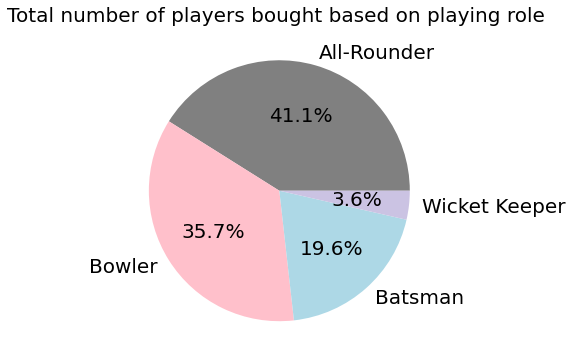

In [184]:
g = auction['TYPE'].value_counts() # getting different types of value in acution type
a = auction['TYPE']
a = list(dict.fromkeys(a))
#add colors
colors = ['gray','pink','#ADD8E6','#CBC3E3']
labels = auction['TYPE']
pie=plt.pie(g, labels = a ,colors=colors,
        autopct='%1.1f%%', textprops={'fontsize': 20})
plt.xticks(fontsize = 100)
plt.title("Total number of players bought based on playing role ",fontsize=20)

# plt.legend(loc="upper right")
plt.gcf().set_size_inches(10,6)
plt.show()

### Top 10 buys in Ipl history 

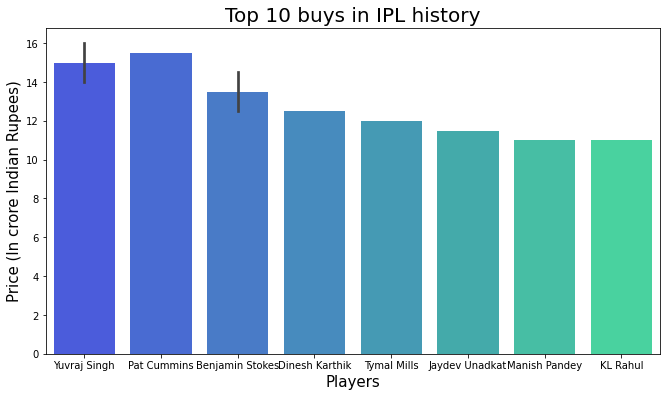

In [11]:
top_10_buys =auction.nlargest(10, ['PRICE(In crore Indian Rupees) '])
plt.figure(figsize=(11,6))
sns.barplot(x=top_10_buys['PLAYER'],y=top_10_buys['PRICE(In crore Indian Rupees) '],alpha=0.8,palette='winter')
plt.xlabel("Players",fontsize=15)
plt.ylabel('Price (In crore Indian Rupees)',fontsize=15)
plt.title("Top 10 buys in IPL history",fontsize=20)
plt.show();


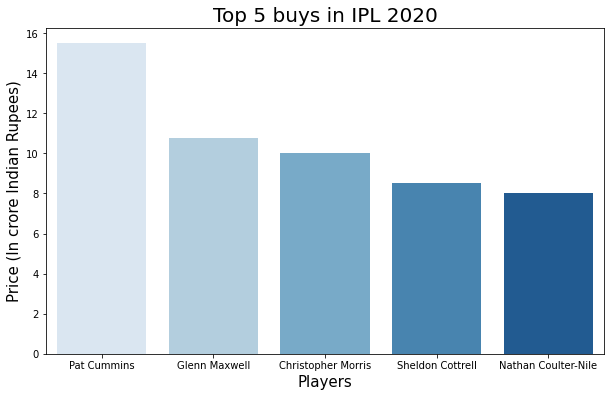

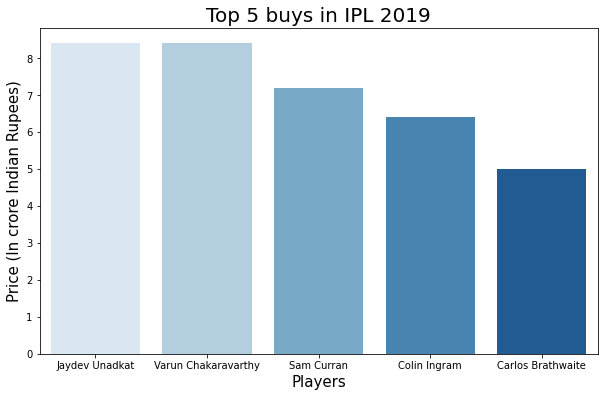

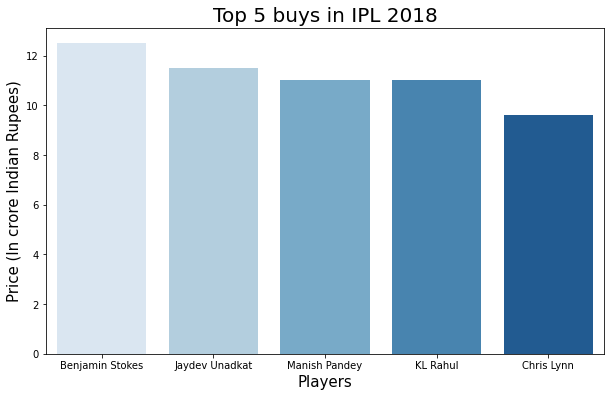

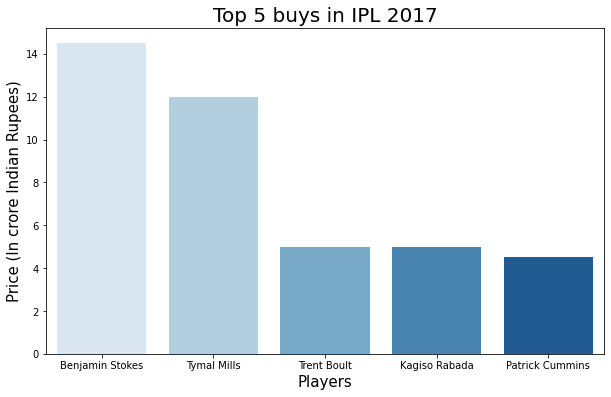

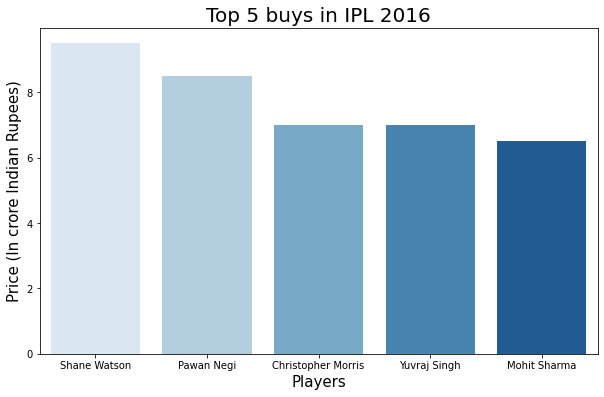

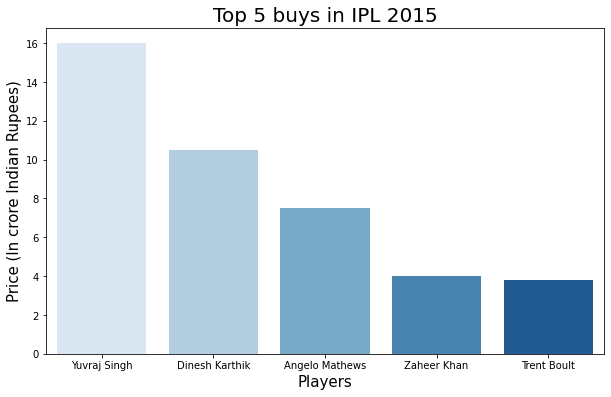

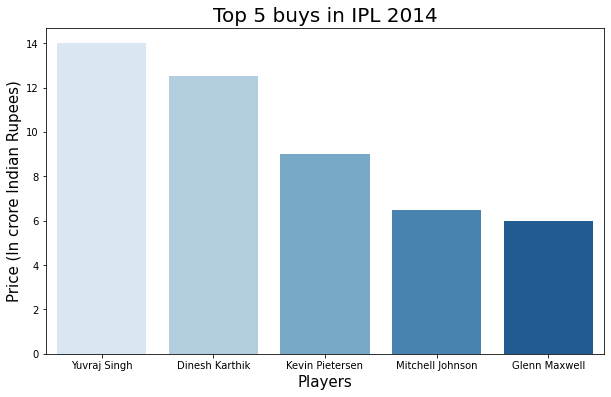

In [12]:
year=[2020,2019,2018,2017,2016,2015,2014]

for i in year:
    top_5_in_2020=auction[auction['YEAR']==i].nlargest(5, ['PRICE(In crore Indian Rupees) '])
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_5_in_2020['PLAYER'],y=top_5_in_2020['PRICE(In crore Indian Rupees) '],orient='v', palette="Blues")
    plt.xlabel("Players",fontsize=15)
    plt.ylabel('Price (In crore Indian Rupees)',fontsize=15)
    plt.title(f"Top 5 buys in IPL {i}",fontsize=20)
    plt.show();

### Matches Played across each season

<Figure size 1440x432 with 0 Axes>

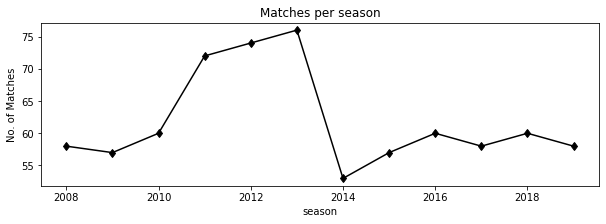

In [185]:
plt.figure(figsize=(20,6))
fig = plt.figure()
ax = fig.add_subplot(111)
ax=match_data.groupby("season")["result"].count().plot(kind="line",title="Matches per season", marker='d',color=['black'],figsize=(10,3)) 
plt.ylabel("No. of Matches");




### Most Favourite Umpires

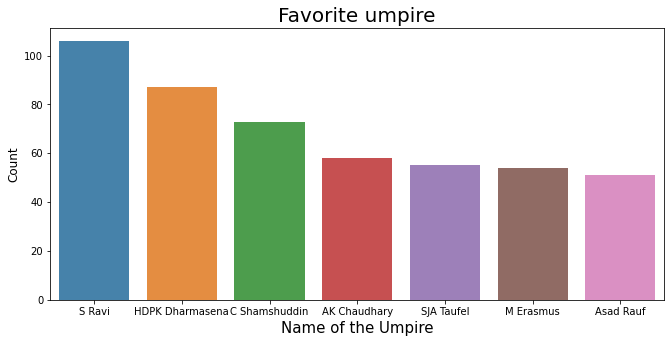

In [14]:
ump=pd.concat([match_data['umpire1'],match_data['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:7]
plt.figure(figsize=(11,5))
Most_umpired =sns.barplot(x=ump.index, y=ump.values, alpha=0.9)

plt.title('Favorite umpire',fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)

plt.show()


### Stadium Wise Analysis for few  Venues

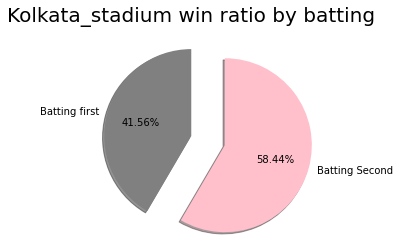

In [168]:
Kolkata_stadium=match_data.loc[(match_data['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['gray','pink'])
plt.title("Kolkata_stadium win ratio by batting",fontsize=20)
plt.show()

### All time win percentage in IPL history on basis of batting first and batting second

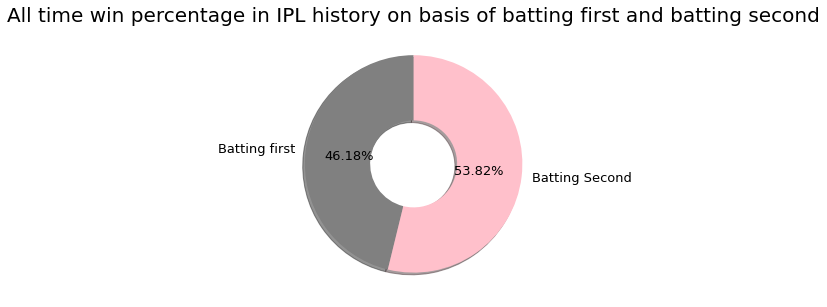

In [170]:
d = match_data.loc[(match_data['toss_decision']=='bat') ]
d_w=d[d['win_by_runs']>0]
s1 =[len(d_w),len(d)-len(d_w)]
l=['Batting first','Batting Second']
plt.figure(figsize=(15,5))
plt.pie(s1,labels=l,startangle=90,shadow=1,autopct='%1.2f%%',colors=['gray','pink'],wedgeprops={'width': 0.6},textprops={'fontsize': 13})
plt.title("All time win percentage in IPL history on basis of batting first and batting second",fontsize=20)
plt.show()


 ### Is Toss Winner Also the Match Winner? For the year 2018

In [17]:
match_data[match_data['season']==2018].count() #total number of matches

id                 60
season             60
city               60
date               60
team1              60
team2              60
toss_winner        60
toss_decision      60
result             60
dl_applied         60
winner             60
win_by_runs        60
win_by_wickets     60
player_of_match    60
venue              60
umpire1            60
umpire2            60
dtype: int64

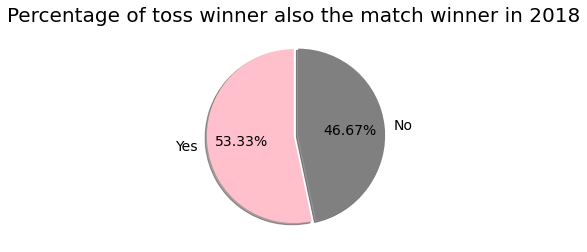

In [189]:
match_2018=match_data[match_data['season']==2018]
df=match_2018[match_2018['toss_winner']==match_2018['winner']]

slices=[len(df),(60-len(df))]# because Toal 60 matches were played in 2018
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['pink','gray'],textprops={'fontsize': 14})
plt.title("Percentage of toss winner also the match winner in 2018",fontsize=20)
plt.show()

#53.3%!!! chances is that the toss winning team wins the title. Thats a huge number and thus indication that winning the toss plays a great role in match winning!!


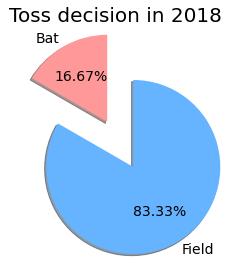

In [191]:
dfs=match_data[(match_data['toss_decision']=='field') & (match_data['season']==2018) ]
labels=['Bat','Field']
slices=[60-len(dfs),len(dfs)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'],textprops={'fontsize': 14})
plt.title("Toss decision in 2018",fontsize=20)
plt.show()



### Toss Decisions across Seasons

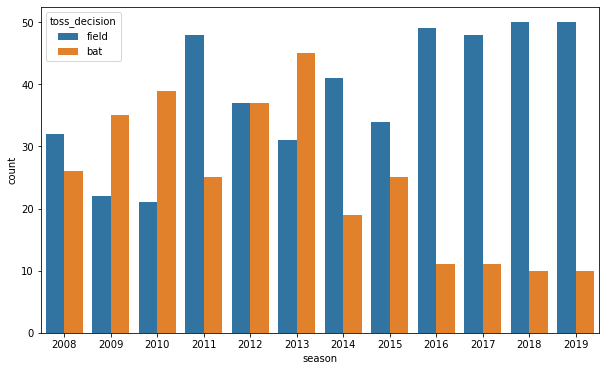

In [21]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=match_data)
plt.show()
#The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2013 though, the majority of toss winners opted for batting.


 ### Maximum Toss Winners and actually winning the match

                             winner  toss_winner
Chennai Super Kings              57           89
Mumbai Indians                   56           96
Kolkata Knight Riders            53           91
Rajasthan Royals                 42           77
Royal Challengers Bangalore      39           78
Delhi Daredevils                 35           79
Kings XI Punjab                  34           80
Sunrisers Hyderabad              22           45
Deccan Chargers                  19           43
Gujarat Lions                    10           15
Rising Pune Supergiant            8           13
Delhi Capitals                    6            9
Kochi Tuskers Kerala              4            8
Pune Warriors                     3           20


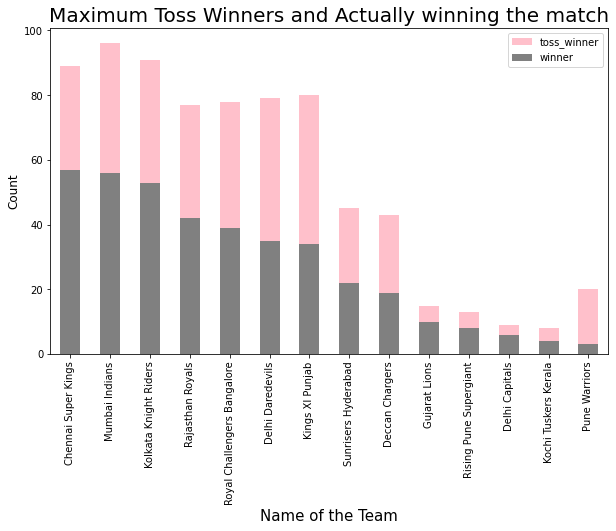

In [160]:
ax=match_data[match_data['toss_winner']==match_data['winner']]['winner'].value_counts()
ax1=match_data['toss_winner'].value_counts()
# print(ax)
# print(ax1)
df=pd.concat([ax,ax1], axis=1)
print(df)
_, ax = plt.subplots()

df.toss_winner.plot(kind='bar', ax=ax, color='pink')
df.winner.plot(kind='bar', ax=ax, color='gray')
ax.legend(["toss_winner", "winner"]);
plt.title('Maximum Toss Winners and Actually winning the match',fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Team', fontsize=15)
plt.gcf().set_size_inches(10,6)
plt.show()

 ### Max player of match

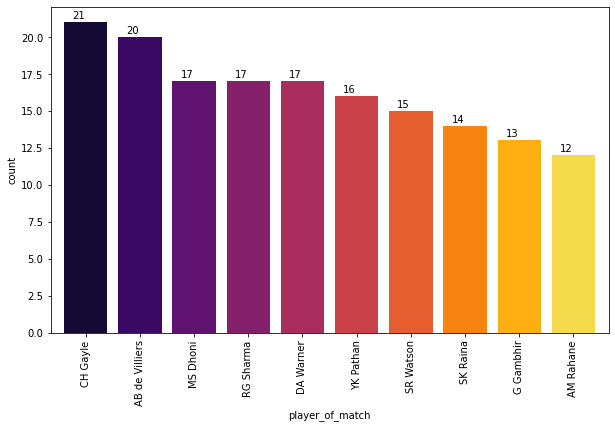

In [24]:
plt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = match_data['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### Teams playing aginst each other and wining

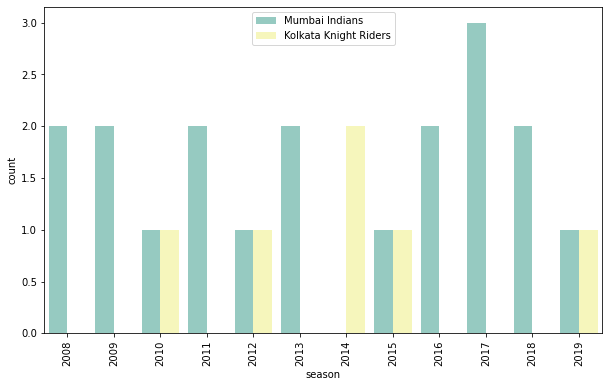

In [25]:
def team1_vs_team2(team1,team2):
    mt1=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))&((match_data['team1']==team2)|(match_data['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
team1_vs_team2('Kolkata Knight Riders','Mumbai Indians')

#MI have defeated KKR in 13 out of 18 matches played between them.Only in the year 2014, KKR won both the matches.Thus in a MI vs KKR match, we know on whom should we bet upon. Similar comparisions can be done between any two teams, we just need to change the team names.



### The teams have played and won the finals

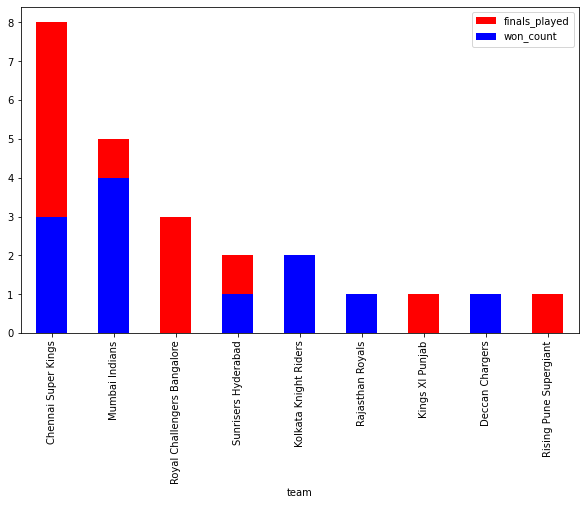

In [35]:
finals=match_data.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
_, ax = plt.subplots()
most_finals.finals_played.plot(kind='bar', ax=ax, color='red')
most_finals.won_count.plot(kind='bar', ax=ax, color='blue')
ax.legend(["finals_played", "won_count"]);


# most_finals.plot.bar(width=0.8,stacked=True)
plt.gcf().set_size_inches(10,6)
plt.show()


### Top 10 Batsmen with most fours in the IPL .

Text(0, 0.5, 'No. of Fours')

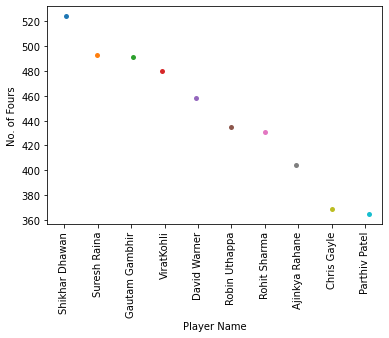

In [113]:
fours = top_bat.sort_values(by = '4s', ascending = False).head(10)
sns.stripplot(data= fours, x= 'PLAYER',y='4s')
# fours['4s'].hist()
# plt.scatter(fours['PLAYER'],fours['4s'])
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('No. of Fours')


### Range of strike rate in IPL

/Users/bhawikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


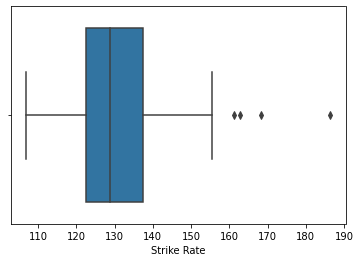

In [172]:
bp=sns.boxplot(top_bat.SR)
# print(top_bat.SR.quantile(0.25))
# print(top_bat.SR.quantile(0.75))
# print(top_bat.SR.quantile(0.75)-top_bat.SR.quantile(0.25))
plt.xlabel('Strike Rate');